# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

# Time Series Forecasting for Covid Dataset

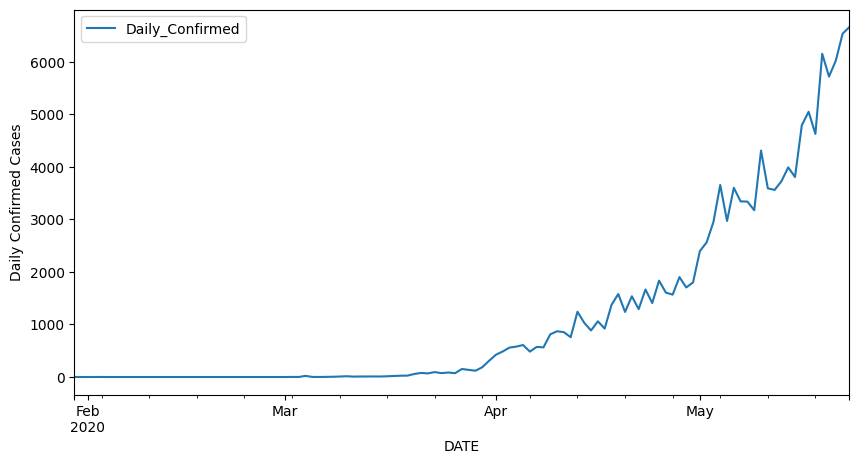

In [2]:
# Importing the Data and Visualizing It
df = pd.read_csv('/kaggle/input/arima01/covid.csv', index_col='DATE', parse_dates=True)
df.plot(figsize=(10,5))
plt.ylabel("Daily Confirmed Cases");

In [3]:
# Finding D i.e. Order of Differencing
# Stationarity Check and Conversion to Stationary TS
adf_test = adfuller(df['Daily_Confirmed'])
print(f'p-value: {adf_test[1]}');

p-value: 1.0


p-value: 0.8984569947893328


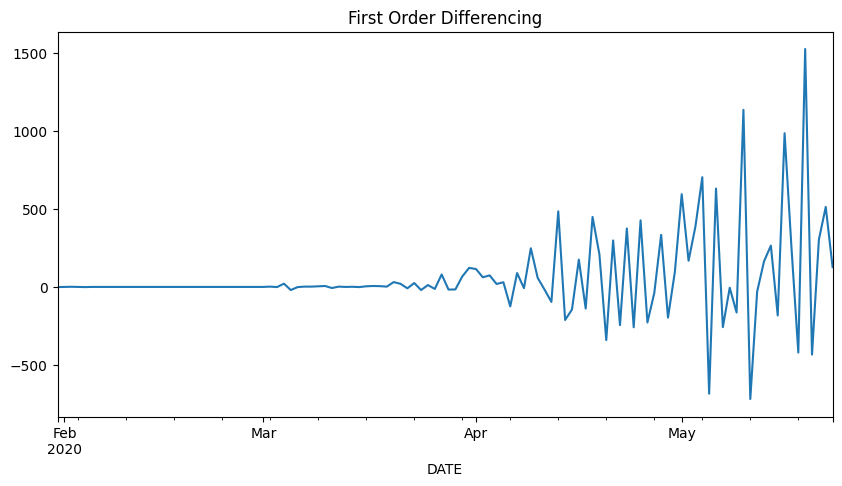

In [4]:
# First Order Differencing
diff_df = df['Daily_Confirmed'].diff().dropna()
diff_df.plot(title="First Order Differencing",figsize=(10,5));
print('p-value:',adfuller(diff_df)[1]);

p-value: 1.0426744091834329e-07


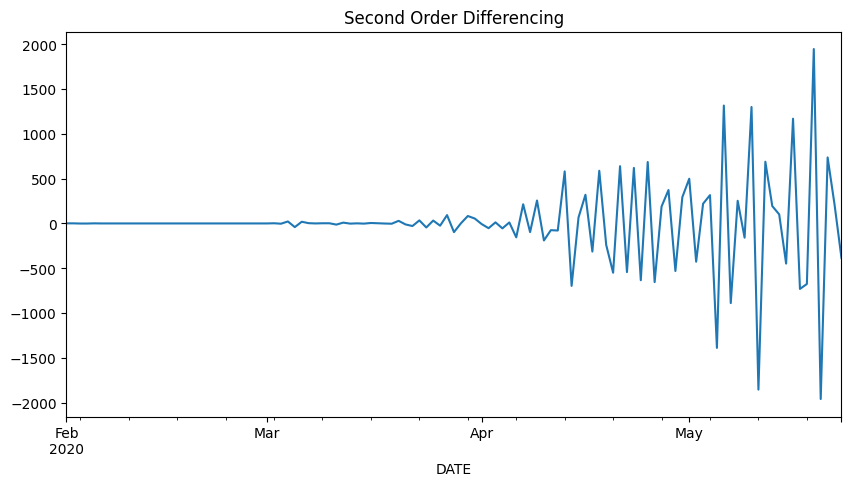

In [5]:
# Second Order Differencing
diff_df2 = diff_df.diff().dropna()
diff_df2.plot(title="Second Order Differencing",figsize=(10,5))
print("p-value:",adfuller(diff_df2)[1]);

From the p-value we can conclude that our time series is now stationary after second order differencing

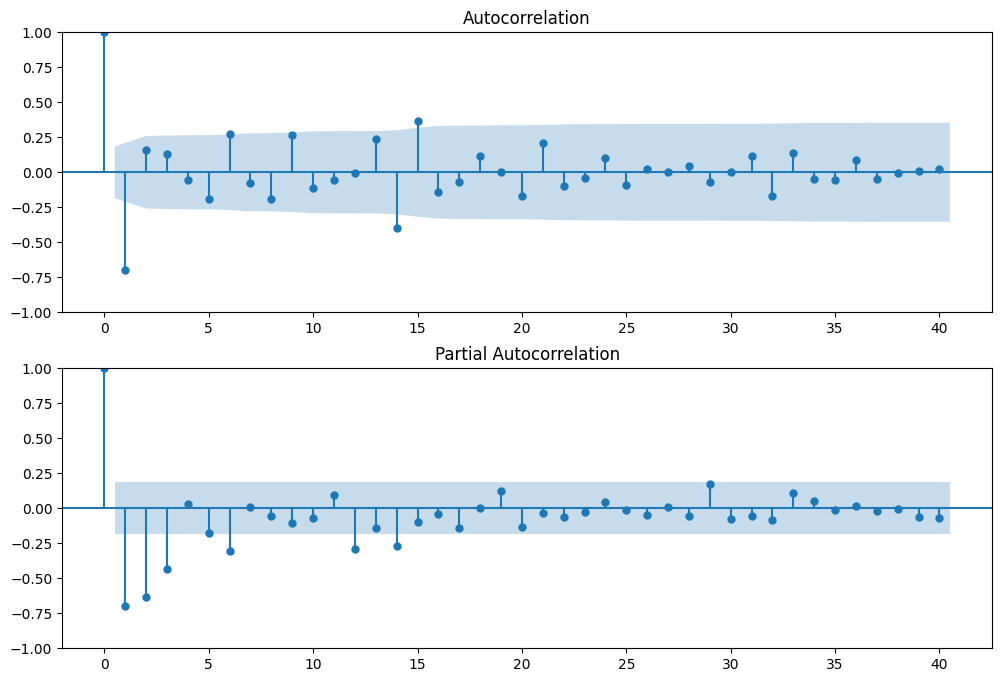

Suggested p: 20, q: 37


In [6]:
# Finding P and Q 
# Using the Autocorrelation and Partial Auto-Correlation Function

# Create ACF and PACF plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(diff_df2, lags=40, ax=ax1)
plot_pacf(diff_df2, lags=40, ax=ax2)
plt.show()

# Determine p and q based on significant lags
acf_values= sm.tsa.acf(diff_df2, nlags=40)
pacf_values= sm.tsa.pacf(diff_df2, nlags=40)

# Define a significance threshold (e.g., 0.2)
acf_threshold = 0.2
pacf_threshold = 0.2

# Find significant lags for p and q
try:
    p = np.where(acf_values[1:] > acf_threshold)[0].max()
    q = np.where(pacf_values[1:] > pacf_threshold)[0].max()
except Exception as e:
    p = 0
    q = 0

print(f"Suggested p: {p}, q: {q}")

In [7]:
arima = ARIMA(df['Daily_Confirmed'], order=(p,2,q))
arima.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        Daily_Confirmed   No. Observations:                  115
Model:               ARIMA(20, 2, 37)   Log Likelihood                -811.414
Date:                Sun, 08 Oct 2023   AIC                           1738.829
Time:                        12:14:52   BIC                           1897.017
Sample:                    01-30-2020   HQIC                          1803.020
                         - 05-23-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4193   7921.494  -5.29e-05      1.000   -1.55e+04    1.55e+04
ar.L2         -1.0509   1.22e+04  -8.61e-05      1.000   -2.39e+04    2.39e+04
ar.L3         -0.3118   2.05e+04  -1.52e-05      1.000   -4.01e+04    4.01e+04
ar.L4         -0.3643   2.56e+04  -1.43e-05      1.000   -5.01e+04    5.01e+04
ar.L5          0.3631   2.73e+04   1.33e-05      1.000   -5.36e+04    5.36e+04
ar.L6          0.4734   2.66e+04   1.78e-05      1.000   -5.21e+04    5.21e+04
ar.L7          0.7986   2.06e+04   3.87e-05      1.000   -4.04e+04    4.04e+04
ar.L8          0.2064   1.44e+04   1.43e-05      1.000   -2.82e+04    2.82e+04
ar.L9          0.3583   1.13e+04   3.17e-05      1.000   -2.21e+04    2.21e+04
ar.L10        -0.0929   8288.497  -1.12e-05      1.000   -1.62e+04    1.62e+04
ar.L11        -0.7552   9927.255  -7.61e-05      1.000   -1.95e+04    1.95e+04
ar.L12        -0.4360    1.5e+04   -2.9e-05      1.000   -2.95e+04    2.95e+04
ar.L13        -0.7959   2.04e+04   -3.9e-05      1.000      -4e+04       4e+04
ar.L14         0.0036   2.52e+04   1.43e-07      1.000   -4.94e+04    4.94e+04
ar.L15        -0.1177   2.69e+04  -4.37e-06      1.000   -5.28e+04    5.28e+04
ar.L16         0.6943   2.59e+04   2.68e-05      1.000   -5.07e+04    5.07e+04
ar.L17         0.5179   2.06e+04   2.51e-05      1.000   -4.04e+04    4.04e+04
ar.L18         0.9841   1.46e+04   6.74e-05      1.000   -2.86e+04    2.86e+04
ar.L19         0.1914   6400.504   2.99e-05      1.000   -1.25e+04    1.25e+04
ar.L20         0.4020   3951.255      0.000      1.000   -7743.915    7744.720
ma.L1         -1.0024   7903.753     -0.000      1.000   -1.55e+04    1.55e+04
ma.L2          1.1743   4301.867      0.000      1.000   -8430.331    8432.680
ma.L3         -1.0628   9972.417     -0.000      1.000   -1.95e+04    1.95e+04
ma.L4          0.4518   7761.839   5.82e-05      1.000   -1.52e+04    1.52e+04
ma.L5         -0.9207   7858.286     -0.000      1.000   -1.54e+04    1.54e+04
ma.L6          0.4009   8908.679    4.5e-05      1.000   -1.75e+04    1.75e+04
ma.L7         -0.7072   9986.106  -7.08e-05      1.000   -1.96e+04    1.96e+04
ma.L8          0.7730   9119.354   8.48e-05      1.000   -1.79e+04    1.79e+04
ma.L9         -0.3972   6770.330  -5.87e-05      1.000   -1.33e+04    1.33e+04
ma.L10         0.4468   5930.666   7.53e-05      1.000   -1.16e+04    1.16e+04
ma.L11         0.5453   4406.636      0.000      1.000   -8636.303    8637.393
ma.L12        -0.5217   6467.225  -8.07e-05      1.000   -1.27e+04    1.27e+04
ma.L13         0.7608   7010.106      0.000      1.000   -1.37e+04    1.37e+04
ma.L14        -1.0225   8737.613     -0.000      1.000   -1.71e+04    1.71e+04
ma.L15         0.9397   8539.289      0.000      1.000   -1.67e+04    1.67e+04
ma.L16        -1.5274   9551.372     -0.000      1.000   -1.87e+04    1.87e+04
ma.L17         1.1340   9234.281      0.000      1.000   -1.81e+04    1.81e+04
ma.L18        -1.2191   8594.162     -0.000      1.000   -1.68e+04    1.68e+04
ma

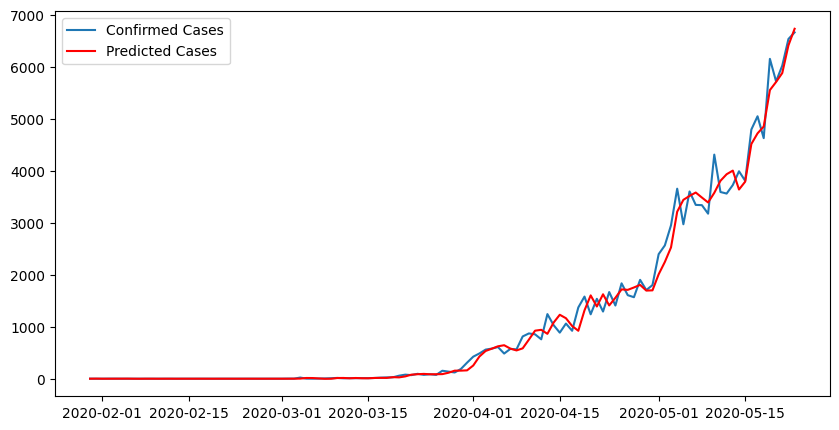

In [8]:
# Making Predictions on Itself
predictions = arima.fit().predict()

plt.figure(figsize=(10,5))
plt.plot(df['Daily_Confirmed'], label="Confirmed Cases")
plt.legend()

plt.plot(predictions, label="Predicted Cases",color='r')
plt.legend()
plt.show();

In [9]:
# Checking the accuracy
print("RMSE:", mean_squared_error(df['Daily_Confirmed'],predictions)**0.5)

RMSE: 180.0734414812161


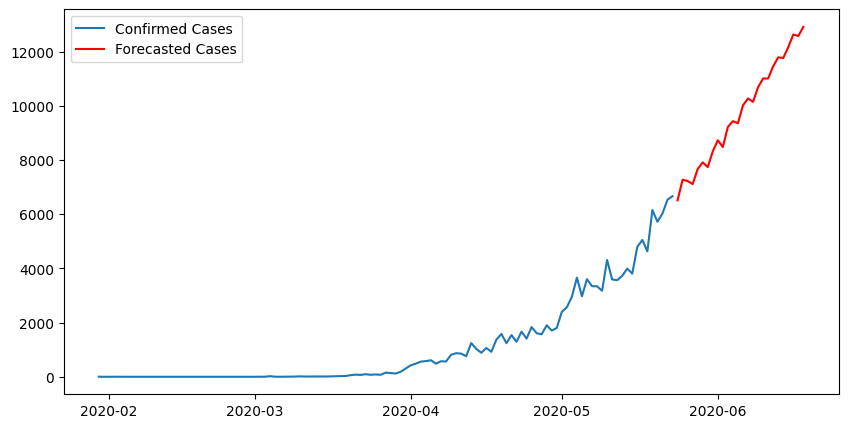

In [10]:
# Making Future Predicitons
predictions = arima.fit().predict(115,140)

plt.figure(figsize=(10,5))
plt.plot(df['Daily_Confirmed'], label="Confirmed Cases")
plt.legend()

plt.plot(predictions, label="Forecasted Cases",color='r')
plt.legend()
plt.show();

# Time Series Forecasting for MJD

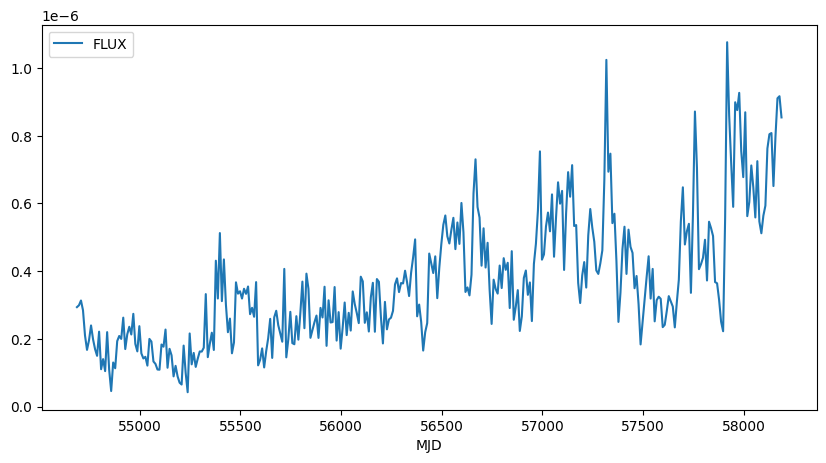

In [11]:
# Importing the Data and Visualizing It
df = pd.read_csv('/kaggle/input/arima01/mjd_flux.csv', index_col='MJD')
df.plot(figsize=(10,5));

In [12]:
# Finding D i.e. Order of Differencing
#Stationarity Check and Conversion to Stationary TS
adf_test = adfuller(df['FLUX'])
print(f'p-value: {adf_test[1]}');

p-value: 0.8050302703804764


p-value: 2.1521216478590396e-11


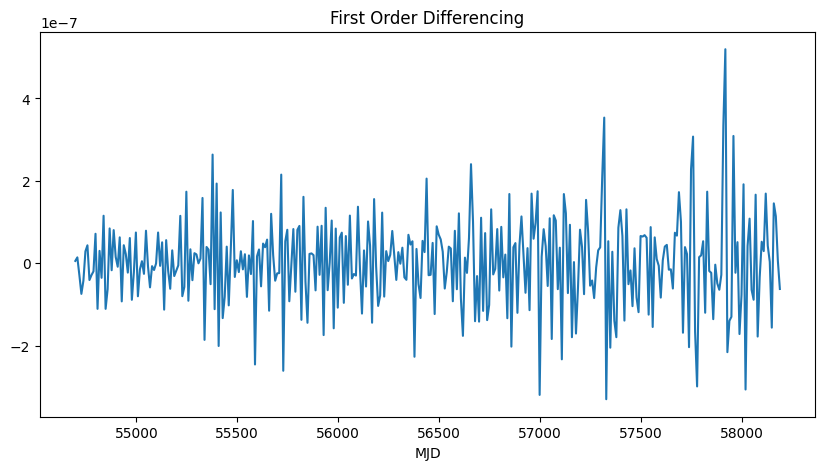

In [13]:
# First Order Differencing
diff_df = df['FLUX'].diff().dropna()
diff_df.plot(title="First Order Differencing",figsize=(10,5));
print('p-value:',adfuller(diff_df)[1])

From the p-value we can conclude that our time series is now stationary after second order differencing


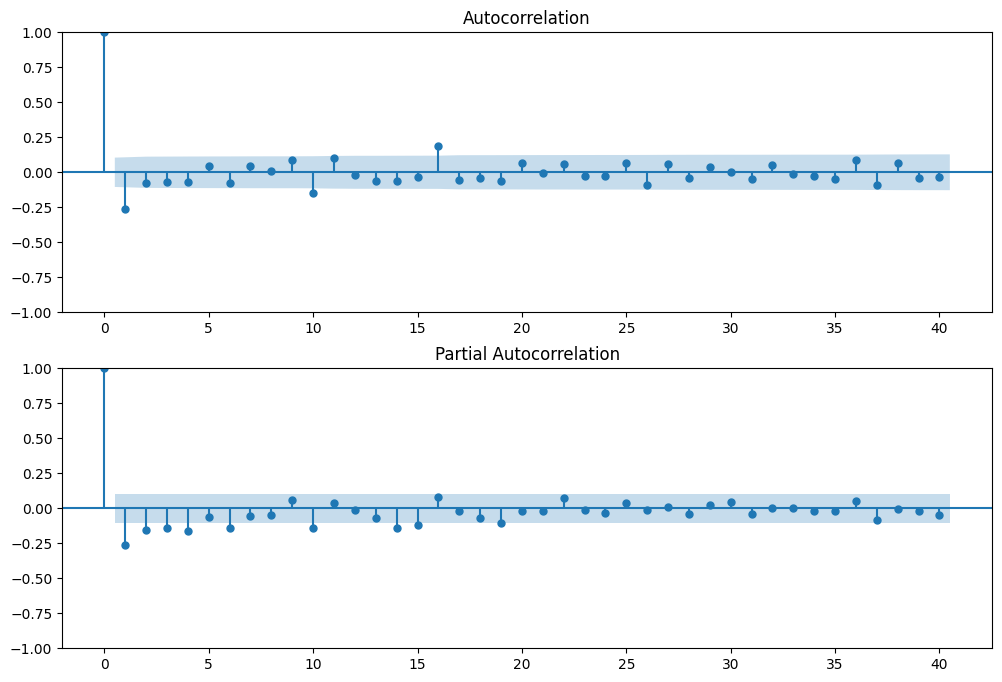

Suggested p: 0, q: 0


In [14]:
# Finding P and Q 
# Using the Autocorrelation and Partial Auto-Correlation Function
# Create ACF and PACF plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(diff_df, lags=40, ax=ax1)
plot_pacf(diff_df, lags=40, ax=ax2)
plt.show()

# Determine p and q based on significant lags
acf_values= sm.tsa.acf(diff_df, nlags=90)
pacf_values= sm.tsa.pacf(diff_df, nlags=90)

# Define a significance threshold (e.g., 0.2)
acf_threshold = 0.2
pacf_threshold = 0.2

# Find significant lags for p and q
try:
    p = np.where(acf_values[1:] > acf_threshold)[0].max()
    q = np.where(pacf_values[1:] > pacf_threshold)[0].max()
except Exception as e:
    p = 0
    q = 0

print(f"Suggested p: {p}, q: {q}")

In [15]:
arima = ARIMA(df['FLUX'], order=(0,1,0)) 
arima.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   FLUX   No. Observations:                  351
Model:                 ARIMA(0, 1, 0)   Log Likelihood                4158.814
Date:                Sun, 08 Oct 2023   AIC                          -8315.628
Time:                        12:16:10   BIC                          -8311.770
Sample:                             0   HQIC                         -8314.093
                                - 351                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       7.09e-12   1.02e-10      0.070      0.945   -1.93e-10    2.07e-10
===================================================================================
Ljung-Box (L1) (Q):                  23.87   Jarque-Bera (JB):                45.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.54   Skew:                             0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

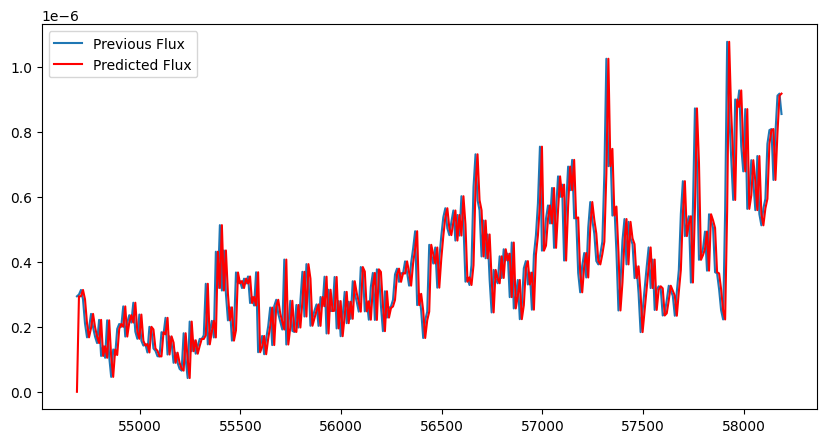

In [16]:
# Making Predictions on the train data itself
predictions = arima.fit().predict()

plt.figure(figsize=(10,5))

plt.plot(df['FLUX'], label="Previous Flux")
plt.legend()

plt.plot(predictions, label="Predicted Flux",color='r')
plt.legend()
plt.show();

In [17]:
print("RMSE:",mean_squared_error(df['FLUX'],predictions)**0.5)

RMSE: 1.1077759428696618e-07


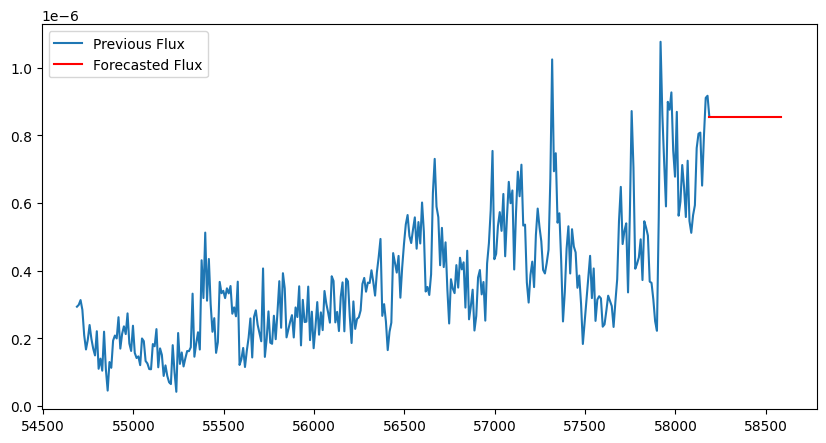

In [18]:
predictions = arima.fit().predict(start=58187, end=58587)

plt.figure(figsize=(10,5))

plt.plot(df['FLUX'], label="Previous Flux")
plt.legend()

plt.plot(predictions, label="Forecasted Flux",color='r')
plt.legend()
plt.show();

The model shows overfitting hence despite making excellent predictions on the training data it is not able to forecast properly.

### Overcoming the Overfitting
by taking the seasonality into account

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.20977D+00    |proj g|=  3.18841D+04


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      2     52      2     0     0   2.508D+04  -8.765D+00
  F =  -8.7650062054032425     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


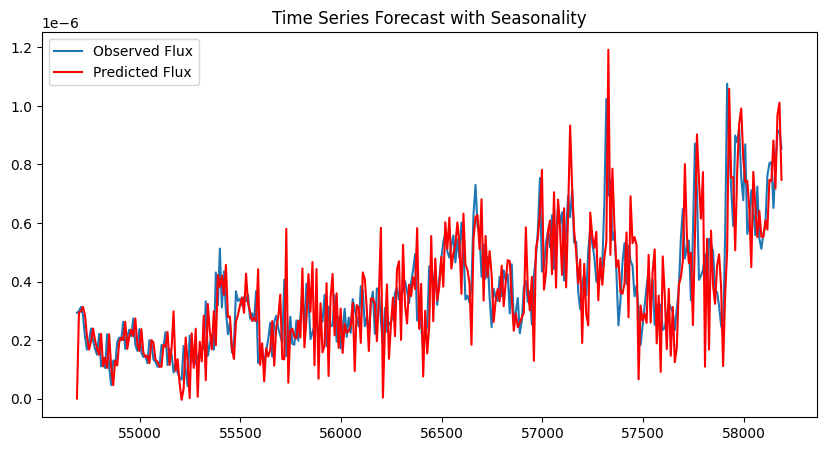

In [19]:
model = sm.tsa.statespace.SARIMAX(df['FLUX'], order= (0, 1, 0), seasonal_order= (0, 1, 0, 48)) # Seasonal Order is calculated using
results = model.fit()

# Making predictions on the same data
predictions_sd = results.predict()

plt.figure(figsize=(10,5))
plt.plot(df['FLUX'], label='Observed Flux')
plt.plot(predictions_sd, label='Predicted Flux', color='red')
plt.legend()
plt.title('Time Series Forecast with Seasonality');

In [20]:
print("RMSE:",mean_squared_error(df['FLUX'],predictions_sd)**0.5)

RMSE: 1.4311871247192908e-07


[58187.6500347222, 58197.6500347222, 58207.6500347222, 58217.6500347222, 58227.6500347222, 58237.6500347222, 58247.6500347222, 58257.6500347222, 58267.6500347222, 58277.6500347222, 58287.6500347222, 58297.6500347222, 58307.6500347222, 58317.6500347222, 58327.6500347222, 58337.6500347222, 58347.6500347222, 58357.6500347222, 58367.6500347222, 58377.6500347222]


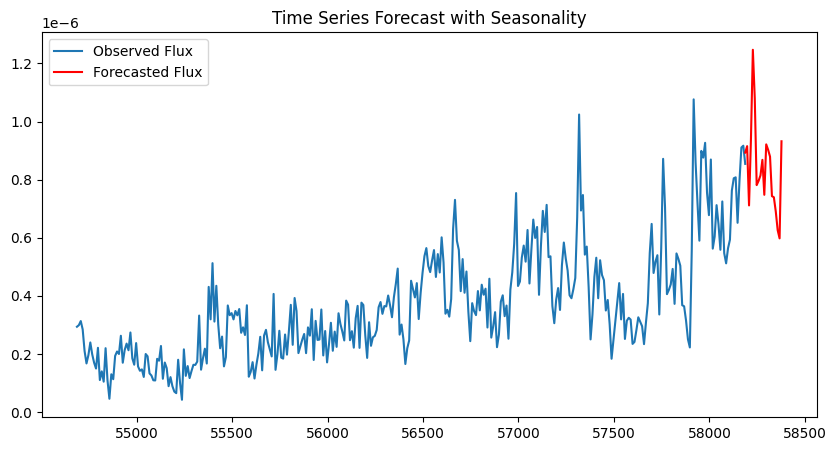

In [21]:
# Generate forecasts for future time periods
forecast_periods = 20  # Number of future periods to forecast
forecast = results.get_forecast(steps=forecast_periods)

L = [58187.6500347222] 
for j in range(forecast_periods-1):
    L.append(L[-1]+10)
print(L)

plt.figure(figsize=(10,5))
plt.plot(df['FLUX'], label='Observed Flux')
plt.plot(L,forecast.predicted_mean, label='Forecasted Flux', color='red')
plt.legend()
plt.title('Time Series Forecast with Seasonality');

```python
# To calculate the seasonal order use this:
# pip install pmdarima
import pmdarima as pm
# Automatically selects seasonal order parameters using pmdarima
seasonal_order = pm.auto_arima(df['FLUX'], seasonal=True, stepwise=True, trace=True)

# Print the selected seasonal order parameters
print("Selected Seasonal Order Parameters:")
print(seasonal_order.summary())
```

The End